In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split

In [2]:
data = pd.read_csv('/kaggle/input/panic-attack-dataset/panic_attack_dataset.csv')

In [3]:
data.head(3)

,ID,Age,Gender,Panic_Attack_Frequency,Duration_Minutes,Trigger,Heart_Rate,Sweating,Shortness_of_Breath,Dizziness,...,Trembling,Medical_History,Medication,Caffeine_Intake,Exercise_Frequency,Sleep_Hours,Alcohol_Consumption,Smoking,Therapy,Panic_Score
0,1,56,Female,9,5,Caffeine,134,Yes,No,Yes,...,No,Anxiety,No,2,3,6.4,5,Yes,Yes,5
1,2,46,Male,8,9,Stress,139,Yes,Yes,No,...,No,PTSD,Yes,2,5,5.0,3,No,Yes,7
2,3,32,Female,6,31,PTSD,141,No,Yes,Yes,...,No,Depression,No,4,0,8.3,8,No,Yes,7


In [4]:
data.describe()

,ID,Age,Panic_Attack_Frequency,Duration_Minutes,Heart_Rate,Caffeine_Intake,Exercise_Frequency,Sleep_Hours,Alcohol_Consumption,Panic_Score
count,1200.000000,1200.000000,1200.000000,1200.00000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000
mean,600.500000,41.134167,4.412500,24.39250,120.302500,2.539167,2.955000,6.481583,4.416667,5.569167
std,346.554469,13.543412,2.847648,11.39993,23.369912,1.716854,2.061516,1.405625,2.902598,2.793155
min,1.000000,18.000000,0.000000,5.00000,80.000000,0.000000,0.000000,4.000000,0.000000,1.000000
25%,300.750000,29.000000,2.000000,15.00000,100.000000,1.000000,1.000000,5.300000,2.000000,3.000000
50%,600.500000,42.000000,4.000000,24.00000,121.000000,3.000000,3.000000,6.500000,4.000000,6.000000
75%,900.250000,53.000000,7.000000,34.00000,141.000000,4.000000,5.000000,7.600000,7.000000,8.000000
max,1200.000000,64.000000,9.000000,44.00000,159.000000,5.000000,6.000000,9.000000,9.000000,10.000000


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1200 entries, 0 to 1199
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   ID                      1200 non-null   int64  
 1   Age                     1200 non-null   int64  
 2   Gender                  1200 non-null   object 
 3   Panic_Attack_Frequency  1200 non-null   int64  
 4   Duration_Minutes        1200 non-null   int64  
 5   Trigger                 1200 non-null   object 
 6   Heart_Rate              1200 non-null   int64  
 7   Sweating                1200 non-null   object 
 8   Shortness_of_Breath     1200 non-null   object 
 9   Dizziness               1200 non-null   object 
 10  Chest_Pain              1200 non-null   object 
 11  Trembling               1200 non-null   object 
 12  Medical_History         1078 non-null   object 
 13  Medication              1200 non-null   object 
 14  Caffeine_Intake         1200 non-null   

In [6]:
data.isna().sum()

ID                          0
Age                         0
Gender                      0
Panic_Attack_Frequency      0
Duration_Minutes            0
Trigger                     0
Heart_Rate                  0
Sweating                    0
Shortness_of_Breath         0
Dizziness                   0
Chest_Pain                  0
Trembling                   0
Medical_History           122
Medication                  0
Caffeine_Intake             0
Exercise_Frequency          0
Sleep_Hours                 0
Alcohol_Consumption         0
Smoking                     0
Therapy                     0
Panic_Score                 0
dtype: int64

In [7]:
data.columns

Index(['ID', 'Age', 'Gender', 'Panic_Attack_Frequency', 'Duration_Minutes',
       'Trigger', 'Heart_Rate', 'Sweating', 'Shortness_of_Breath', 'Dizziness',
       'Chest_Pain', 'Trembling', 'Medical_History', 'Medication',
       'Caffeine_Intake', 'Exercise_Frequency', 'Sleep_Hours',
       'Alcohol_Consumption', 'Smoking', 'Therapy', 'Panic_Score'],
      dtype='object')

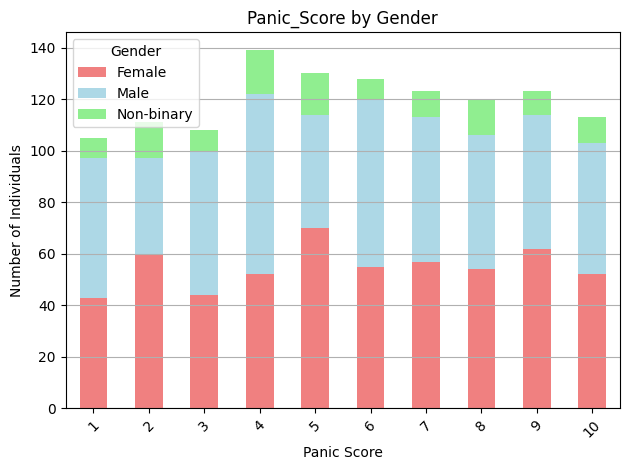

In [8]:
panic_gender_counts = data.groupby(['Panic_Score','Gender']).size().unstack()

panic_gender_counts.plot(kind='bar', stacked=True, color=['lightcoral', 'lightblue','lightgreen'])
plt.title('Panic_Score by Gender')
plt.xlabel('Panic Score')
plt.ylabel('Number of Individuals')
plt.xticks(rotation=45)
plt.legend(title='Gender')
plt.grid(axis='y')

plt.tight_layout()
plt.show()

### Introducing new features

In [9]:
data['Age_Group'] = pd.cut(data['Age'], bins=[0, 20, 30, 40, 50, 60, 70, 80], labels=['0-20', '21-30', '31-40', '41-50', '51-60', '61-70', '71-80'])
data['Panic_Severity'] = data['Panic_Attack_Frequency'].apply(lambda x: 'High' if x >= 7 else 'Moderate' if x >= 4 else 'Low')
data['Caffeine_Level'] = data['Caffeine_Intake'].apply(lambda x: 'High' if x > 3 else 'Low')
data['Sleep_Quality'] = pd.cut(data['Sleep_Hours'], bins=[0, 5, 7, 9, 24], labels=['Poor', 'Average', 'Good', 'Excellent'])
stress_triggers = ['Stress', 'Social Anxiety', 'Caffeine']
data['Stress_Level'] = data['Trigger'].apply(lambda x: 1 if x in stress_triggers else 0)
data['Medical_History_Indicator'] = data['Medical_History'].apply(lambda x: 1 if x in ['Anxiety', 'Depression', 'PTSD'] else 0)

bins = [0, 3, 6, 10]
labels = ['Low', 'Medium', 'High']
data['Panic_Category'] = pd.cut(data['Panic_Score'], bins=bins, labels=labels)

In [10]:
mapping_dict = {'High': 2, 'Medium': 1,'Low':0}
data['Panic_Category'] = data['Panic_Category'].map(mapping_dict)

In [11]:
features_to_use = ['Age_Group', 'Panic_Severity', 'Caffeine_Level', 'Sleep_Quality', 'Stress_Level', 'Medical_History_Indicator', 'Heart_Rate', 'Sweating', 'Shortness_of_Breath', 'Dizziness', 'Chest_Pain', 'Trembling', 'Exercise_Frequency', 'Alcohol_Consumption', 'Smoking', 'Therapy']
dataa = data[features_to_use]
dataa = pd.get_dummies(dataa, drop_first=True)

In [12]:
dataa.columns

Index(['Stress_Level', 'Medical_History_Indicator', 'Heart_Rate',
       'Exercise_Frequency', 'Alcohol_Consumption', 'Age_Group_21-30',
       'Age_Group_31-40', 'Age_Group_41-50', 'Age_Group_51-60',
       'Age_Group_61-70', 'Age_Group_71-80', 'Panic_Severity_Low',
       'Panic_Severity_Moderate', 'Caffeine_Level_Low',
       'Sleep_Quality_Average', 'Sleep_Quality_Good',
       'Sleep_Quality_Excellent', 'Sweating_Yes', 'Shortness_of_Breath_Yes',
       'Dizziness_Yes', 'Chest_Pain_Yes', 'Trembling_Yes', 'Smoking_Yes',
       'Therapy_Yes'],
      dtype='object')

In [13]:
X = dataa
y = data['Panic_Category']

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

              precision    recall  f1-score   support

           0       0.24      0.13      0.17        62
           1       0.30      0.28      0.29        79
           2       0.37      0.49      0.42        99

    accuracy                           0.33       240
   macro avg       0.30      0.30      0.29       240
weighted avg       0.31      0.33      0.31       240



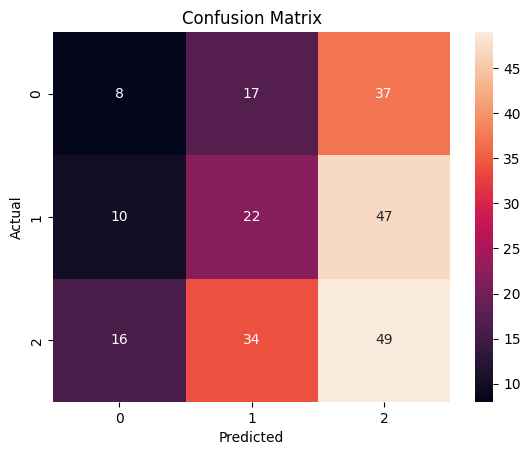

In [15]:
model = RandomForestClassifier(n_estimators=1000)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

print(classification_report(y_test, y_pred))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [16]:
#0.091
gbm_model = GradientBoostingClassifier(n_estimators=10000, learning_rate=0.098, max_depth=10, random_state=42)
gbm_model.fit(X_train, y_train)

y_pred = gbm_model.predict(X_test)

print("Classification Report:")
print(classification_report(y_test, y_pred))


Classification Report:
              precision    recall  f1-score   support

           0       0.27      0.24      0.26        62
           1       0.42      0.42      0.42        79
           2       0.44      0.47      0.46        99

    accuracy                           0.40       240
   macro avg       0.38      0.38      0.38       240
weighted avg       0.39      0.40      0.39       240



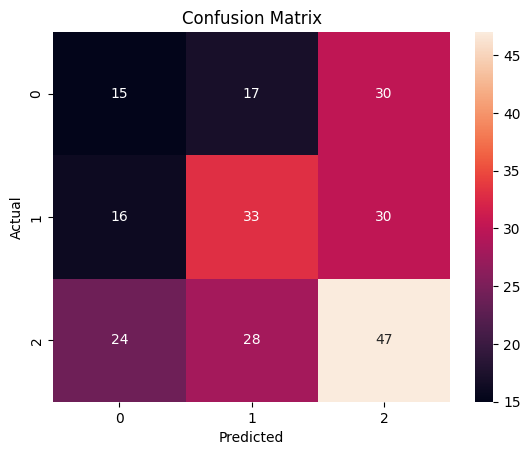

In [17]:
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()